In [6]:
import pandas as pd
import janitor
from utilities import (
    check_make_dir,
    plotline, 
    save_mpl_fig,
)
import matplotlib.pyplot as plt

check_make_dir('../data', '../figures')

In [41]:
def dotplot(data, x='count', y='entity', xticks=None, title=None):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import seaborn as sns
    sns.set_theme(context="notebook", font_scale=1.05, 
                  style='whitegrid')  #  Darkgrid Whitegrid Dark White Ticks

    _, ax = plt.subplots(figsize=(9,9))
    sns.stripplot(x=x, y=y, data=data, 
                  orient='h', color='darkslategray', ax=ax)
    ax.set_ylim(50-.5, -.5)
    sns.despine(left=True)
    if xticks:
        plt.xticks(xticks)
    plt.xlabel('Mentions', fontweight='bold')
    plt.ylabel('')
    ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    def draw_alt_row_colors(ax, rowspan=5, color='0.5', alpha=0.1):
        yticks = ax.get_yticks()
        counter = 1
        for ix, _ in enumerate(yticks):
            if ix%rowspan==0:
                if counter%2==0:
                    ax.axhspan(ix-.5, ix+rowspan-.5, color=color, alpha=alpha, zorder=0)
                counter += 1
        return ax
    draw_alt_row_colors(ax)
    
    if title:
        plt.title(title, fontweight='bold', size=15, loc='left')
    return ax

In [47]:
df_persons = pd.read_csv('../data/toi_top1000_persons.csv')
df_gpe = pd.read_csv('../data/toi_top1000_gpe.csv')
df_persons.head(3)

,entity,nertype,count
0,Madras,PERSON,164505
1,Bill,PERSON,120732
2,ho,PERSON,119288


<AxesSubplot:title={'left':'Top 50 "Persons"'}, xlabel='Mentions'>

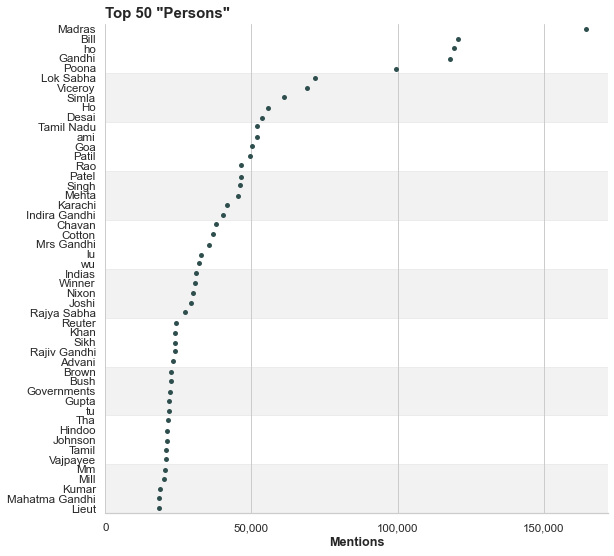

In [42]:
dotplot(df_persons.head(50), xticks=range(0,200000,50000), title='Top 50 "Persons"')
save_mpl_fig('../figures/top50_persons')

<AxesSubplot:title={'left':'Top 50 "Geopolitical entities"'}, xlabel='Mentions'>

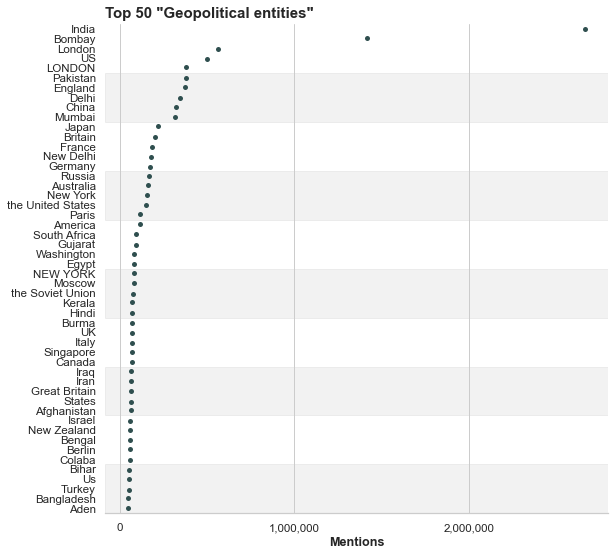

In [46]:
dotplot(df_gpe.head(50), xticks=range(0,3_000_000,1_000_000), title='Top 50 "Geopolitical entities"')
save_mpl_fig('../figures/top50_gpe')